# Loan Application Status Project

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


From above we see that there are total 614 rows and 13 columns from which Loan_status will be our target variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see that there are some null values present so we will treat the null values first 
we will use mode method on object datatype and median on float datatype

In [4]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [5]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no null values present now

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [13]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are:\n", object_datatype)

number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are:\n", number_datatype)

Object Data Type Columns are:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


## Visualisation

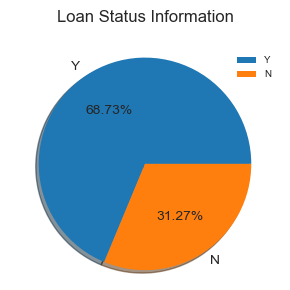

In [19]:
plt.style.use('seaborn-white')
plt.figure(figsize=(3,3))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

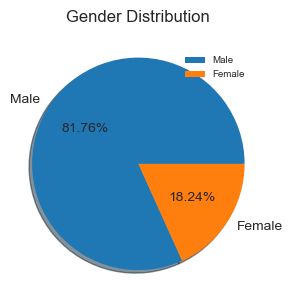

In [23]:
plt.figure(figsize=(3,3))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

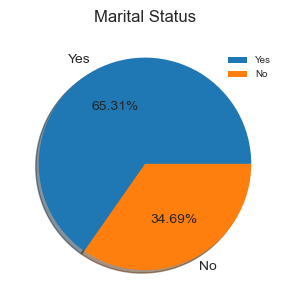

In [25]:
plt.figure(figsize=(3,3))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

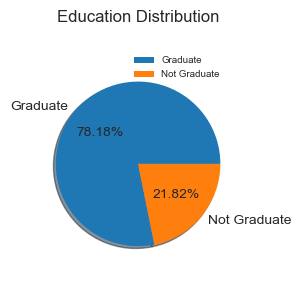

In [26]:
plt.figure(figsize=(3,3))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

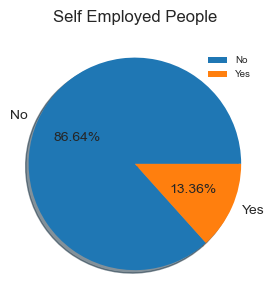

In [27]:
plt.figure(figsize=(3,3))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

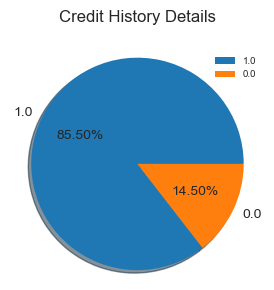

In [28]:
plt.figure(figsize=(3,3))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

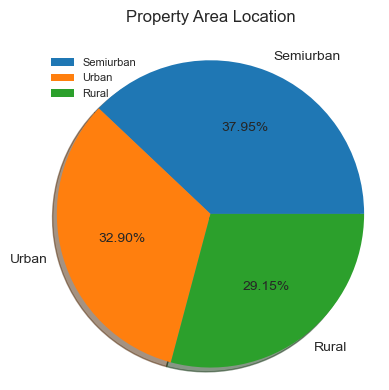

In [31]:
plt.figure(figsize=(4,4))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':8})
plt.axis('equal')
plt.tight_layout()
plt.show()

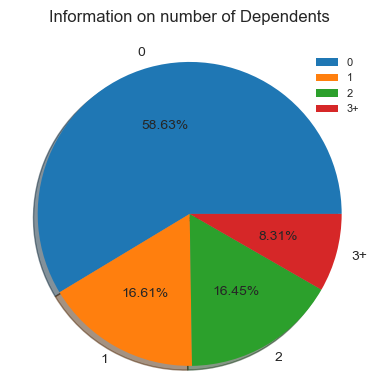

In [32]:
plt.figure(figsize=(4,4))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':8})
plt.axis('equal')
plt.tight_layout()
plt.show()

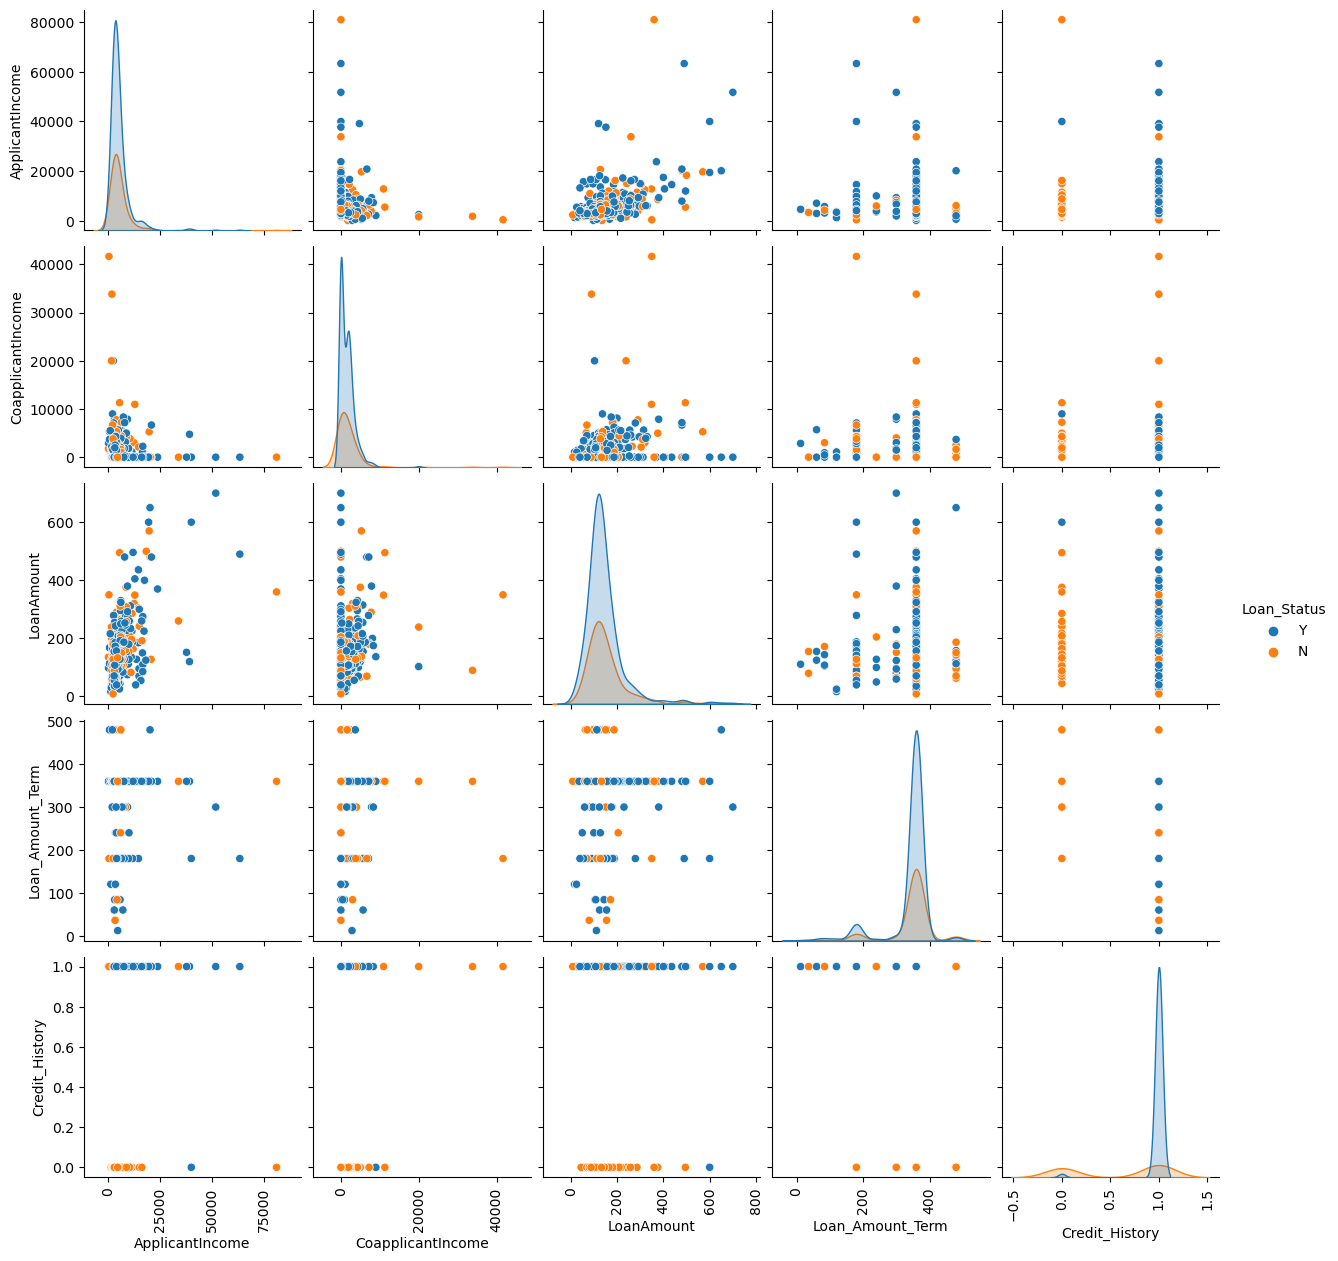

In [33]:
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

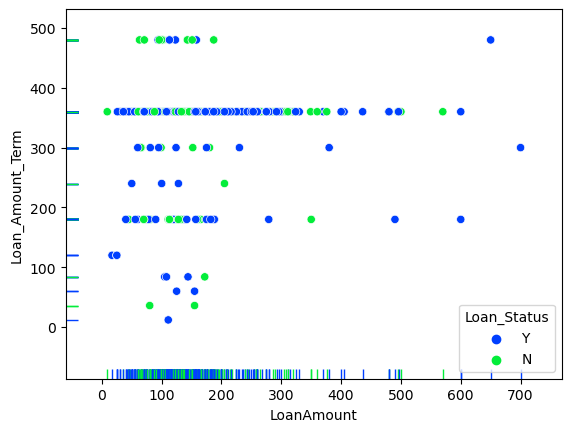

In [40]:
plt.style.use('seaborn-bright')
sns.scatterplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

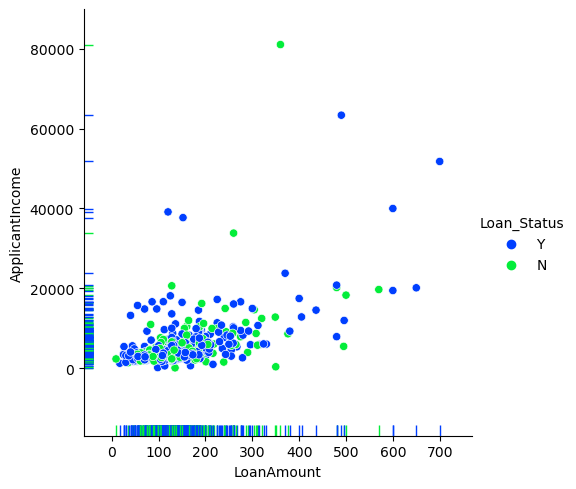

In [41]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

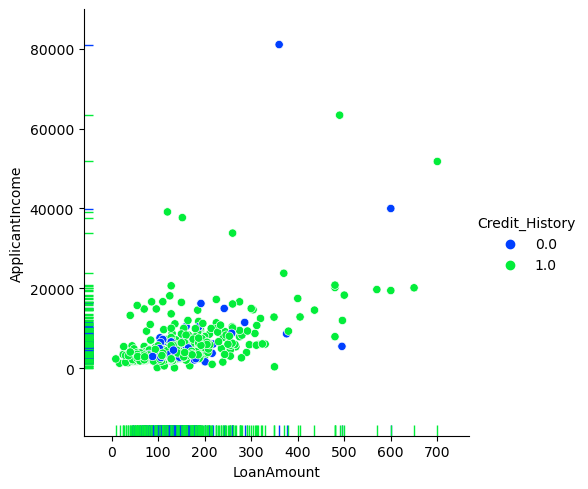

In [42]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

## Encoding the categorical object datatype columns

In [57]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
df.drop(['Loan_ID'],axis=1,inplace=True)
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,128.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1


## Checking for outliers

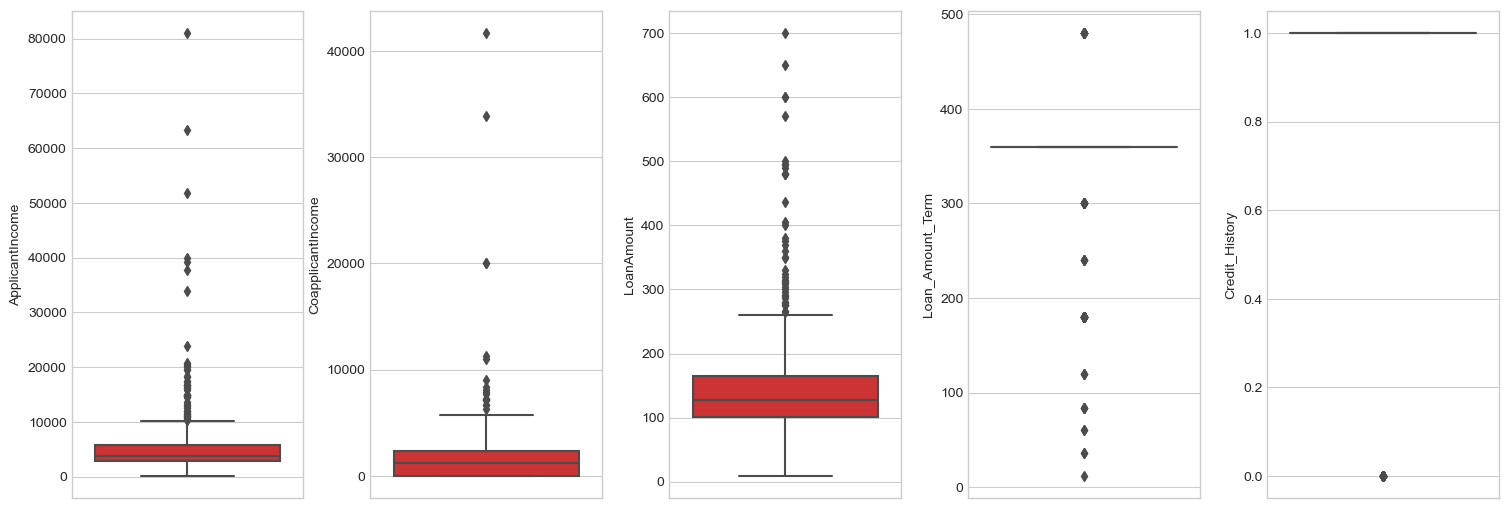

In [44]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of box plot we can see the outlier details present in our numerical data columns which will need to be treated

## Checking for skewness 

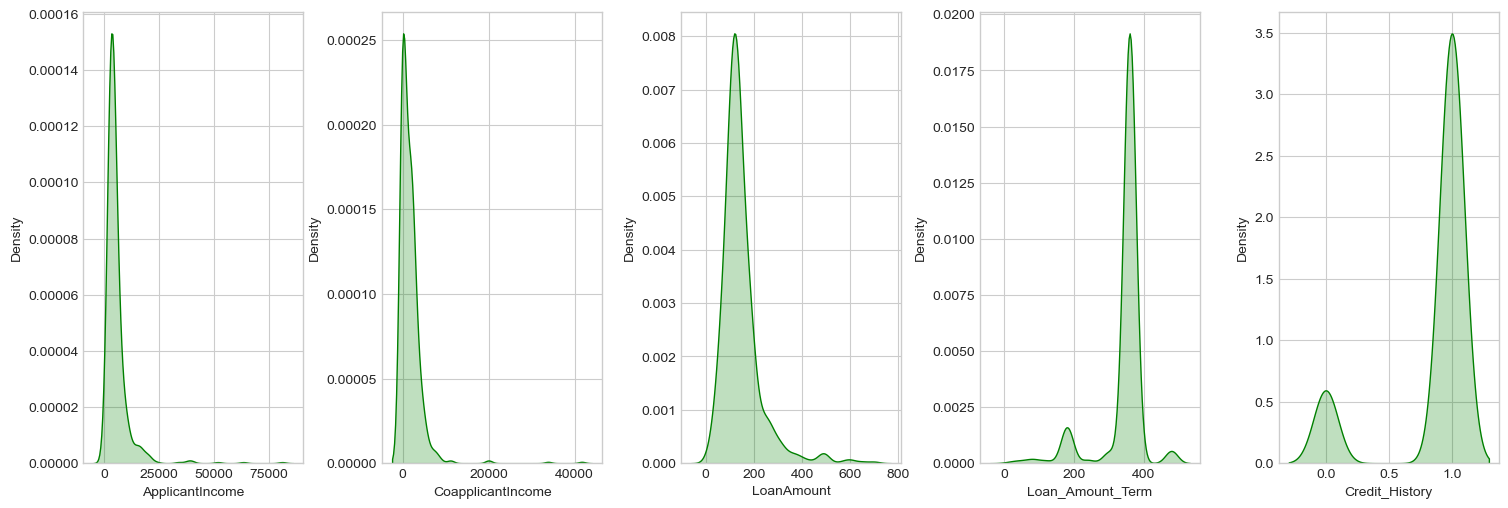

In [45]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

## Correlation using Heatmap

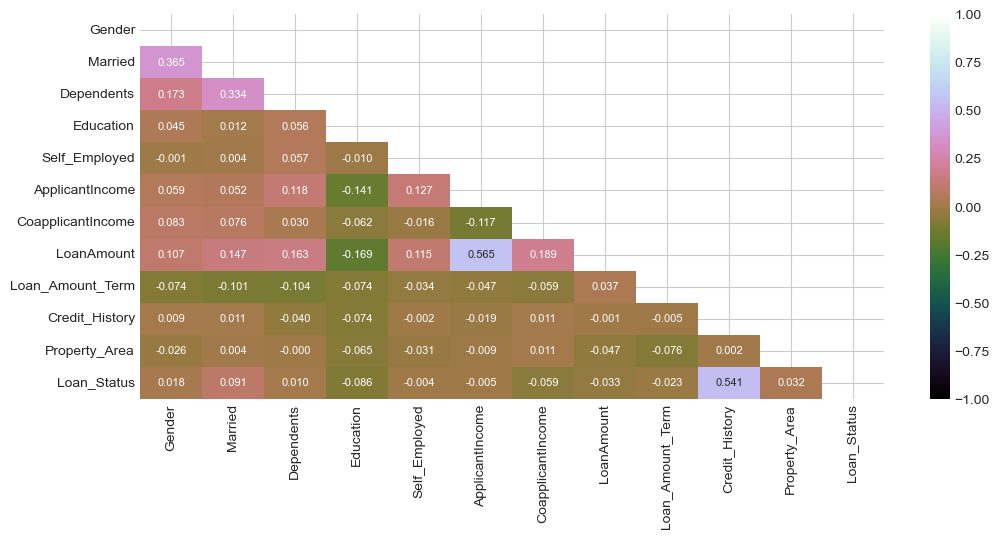

In [51]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Using Z Score to remove outliers

In [80]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (587, 12)
Percentage of data loss post outlier removal:  4.397394136807818


## Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [93]:
X = df1.drop('Loan_Status', axis=1)
Y = df1['Loan_Status']

## Using Log Transform to fix skewness

In [94]:
s=['Gender','Dependents','ApplicantIncome','LoanAmount','Loan_Amount_Term']
from sklearn.preprocessing import PowerTransformer
yj = PowerTransformer(method = 'yeo-johnson')
X[s] = yj.fit_transform(X[s].values)

## Resolving the class imbalance issue in our label column using SMOTE

In [95]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

1    404
0    404
Name: Loan_Status, dtype: int64

## Standard Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483595,-1.292649,-0.800976,-0.559086,-0.383861,0.717295,-1.071866,-0.015431,0.081502,0.596406,1.252522
1,0.483595,0.806003,0.926234,-0.559086,-0.383861,0.282192,0.805241,-0.015431,0.081502,0.596406,-1.297754
2,0.483595,0.806003,-0.800976,-0.559086,2.781719,-0.542421,-1.071866,-1.561819,0.081502,0.596406,1.252522
3,0.483595,0.806003,-0.800976,1.883006,-0.383861,-0.856721,0.919826,-0.165675,0.081502,0.596406,1.252522
4,0.483595,-1.292649,-0.800976,-0.559086,-0.383861,0.761229,-1.071866,0.209553,0.081502,0.596406,1.252522


## Finding best random state

In [109]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score

In [72]:
models_reg=[LinearRegression(),Ridge(),Lasso(),SVR(),XGBRegressor(),GradientBoostingRegressor(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor()]

In [97]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .25, random_state=i)
    for m in models_reg:
        m.fit(x_train,y_train)
        pred = m.predict(x_test)
        acc = r2_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.5683180784313724 on Random State: 43


So the best random state is 43

In [99]:
 x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .25, random_state=43)

## Every regression model with their metrics

In [100]:
for m in models_reg:
    m.fit(x_train,y_train)
    mpred=m.predict(x_test)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(y_test, mpred))
    print("Mean absolute error: ", mean_absolute_error(y_test,mpred))
    print("Mean squared error: ", mean_squared_error(y_test,mpred))
    cvs=cross_val_score(m,x_train,y_train)
    print('Cross Validation Score=',cvs.mean(),'\n')

 For LinearRegression() 
R2 score : 0.4090892572913012
Mean absolute error:  0.32608104011079997
Mean squared error:  0.1477132039905089
Cross Validation Score= 0.28221431455436974 

 For Ridge() 
R2 score : 0.4089303015221575
Mean absolute error:  0.3262491066427534
Mean squared error:  0.14775293903720202
Cross Validation Score= 0.2823048019985177 

 For Lasso() 
R2 score : -0.0001742919389982056
Mean absolute error:  0.5000163382674901
Mean squared error:  0.2500190613120718
Cross Validation Score= -0.013471899896937912 

 For SVR() 
R2 score : 0.4529334326567994
Mean absolute error:  0.26456784507378983
Mean squared error:  0.13675323465593187
Cross Validation Score= 0.32028516914695093 

 For XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=

## HyperParameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['friedman_mse', 'absolute_error', 'poisson', 'squared_error'],
             'min_samples_split':[5,10,15,20],
             'max_features':["sqrt","log2"]}
gcs=GridSearchCV(RandomForestRegressor(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 50}

In [113]:
fmodel=RandomForestRegressor(max_features='sqrt',criterion='friedman_mse',min_samples_split=5,max_depth=20,n_estimators=50)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

58.34639962525296


## Saving the model

In [103]:
import joblib
joblib.dump(fmodel,'Temp_Pred_Next_Tmin')

['Temp_Pred_Next_Tmin']

## AUC ROC Curve

In [114]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=5,color='maroon')
pt.title('Random Forest Classifier')
pt.show()

ValueError: continuous format is not supported